Notebook containing initial analyses and data handling pipelines. We will grade the correctness, quality of code, and quality of textual descriptions.


# Plots and Actors in Blockbusters: What Do People Favor?


# 0.0 Load the dataset

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
os.chdir("/content/gdrive/My Drive/ADA2022/project")

In [3]:
# %cd /content/drive/MyDrive/EPFL_course_project/ada-2022-project-superplainteamname2022/
!pip install -q seaborn==0.12.0

     |████████████████████████████████| 285 kB 4.9 MB/s 


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy

In [7]:
# `movie.metadata.tsv` [3.4 M]

# Metadata for 81,741 movies, extracted from the Noverber 4, 2012 dump of Freebase.  Tab-separated; columns:

# 1. Wikipedia movie ID
# 2. Freebase movie ID
# 3. Movie name
# 4. Movie release date
# 5. Movie box office revenue
# 6. Movie runtime
# 7. Movie languages (Freebase ID:name tuples)
# 8. Movie countries (Freebase ID:name tuples)
# 9. Movie genres (Freebase ID:name tuples)

movie_metadata = pd.read_csv(
    "./MovieSummaries/MovieSummaries/movie.metadata.tsv",
    sep="\t",
    header=None,
    names=[
        "movie_id",
        "freebase_movie_id",
        "movie_name",
        "movie_release_date",
        "movie_box_office_revenue",
        "movie_runtime",
        "movie_languages",
        "movie_countries",
        "movie_genres",
    ],
    parse_dates=["movie_release_date"],
    date_parser=lambda x: pd.to_datetime(x, errors="coerce"),
)
# drop the row that does not have revenue data

movie_metadata.head()
# movie id is wikipedia page id
# https://en.wikipedia.org/?curid={movie_id}

# How to use query freebase id?
# https://edstem.org/eu/courses/134/discussion/3845

# https://query.wikidata.org/#PREFIX%20wd%3A%20%3Chttp%3A%2F%2Fwww.wikidata.org%2Fentity%2F%3E%0APREFIX%20wdt%3A%20%3Chttp%3A%2F%2Fwww.wikidata.org%2Fprop%2Fdirect%2F%3E%0APREFIX%20wikibase%3A%20%3Chttp%3A%2F%2Fwikiba.se%2Fontology%23%3E%0A%0ASELECT%20%20%3Fs%20%3FsLabel%20%3Fp%20%20%3Fo%20%3FoLabel%20WHERE%20%7B%0A%20%3Fs%20wdt%3AP646%20%22%2Fm%2F0181lj%22%20%0A%0A%20%20%20SERVICE%20wikibase%3Alabel%20%7B%0A%20%20%20%20bd%3AserviceParam%20wikibase%3Alanguage%20%22en%22%20.%0A%20%20%20%7D%0A%20%7D

,movie_id,freebase_movie_id,movie_name,movie_release_date,movie_box_office_revenue,movie_runtime,movie_languages,movie_countries,movie_genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988-01-01,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987-01-01,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983-01-01,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [8]:
movie_metadata.shape

(81741, 9)

In [9]:
movie_metadata['year'] = movie_metadata['movie_release_date'].apply(lambda x:x.year)
movie_metadata = movie_metadata.query('year > 2000')
movie_metadata.shape

(23216, 10)

In [31]:
# av = 'Av'
# example = movie_metadata.query('movie_name.str.startswith(av)')
# movie_metadata['movie_name'].str.startswith('Av')
example = copy.deepcopy(movie_metadata)
ava_example = example.loc[example['movie_name'].str.startswith('Avatar')]

In [32]:
ava_example

,movie_id,freebase_movie_id,movie_name,movie_release_date,movie_box_office_revenue,movie_runtime,movie_languages,movie_countries,movie_genres,year
23702,4273140,/m/0bth54,Avatar,2009-12-10,2.782275e+09,178.0,"{""/m/02h40lc"": ""English Language"", ""/m/06nm1"":...","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2009.0
51429,25813358,/m/0gmbk1g,Avatar 2,2015-01-01,NaN,NaN,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06n90"": ""Science Fiction"", ""/m/02kdv5l"": ...",2015.0
52274,15945267,/m/03qhwlm,Avatar,2004-01-01,NaN,90.0,"{""/m/02h40lc"": ""English Language""}","{""/m/06t2t"": ""Singapore""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2004.0


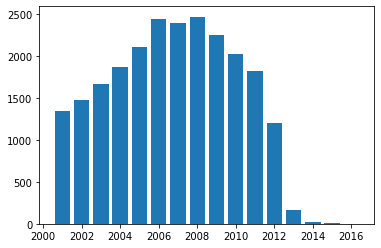

In [33]:
movie_metadata_year = movie_metadata.groupby(['year'])
sizes = movie_metadata_year.size()
plt.bar(sizes.index, sizes)
plt.show()

In [36]:
# `character.metadata.tsv` [14 M]

# Metadata for 450,669 characters aligned to the movies above, extracted from the Noverber 4, 2012 dump of Freebase.  Tab-separated; columns:

# 1. Wikipedia movie ID
# 2. Freebase movie ID
# 3. Movie release date
# 4. Character name
# 5. Actor date of birth
# 6. Actor gender
# 7. Actor height (in meters)
# 8. Actor ethnicity (Freebase ID)
# 9. Actor name
# 10. Actor age at movie release
# 11. Freebase character/actor map ID
# 12. Freebase character ID
# 13. Freebase actor ID

character_metadata = pd.read_csv(
    "./MovieSummaries/MovieSummaries/character.metadata.tsv",
    sep="\t",
    header=None,
    names=[
        "movie_id",
        "freebase_movie_id",
        "movie_release_date",
        "character_name",
        "actor_birthdate",
        "actor_gender",
        "actor_height",
        "actor_ethnicity",
        "actor_name",
        "actor_age",
        "freebase_character_actor_map_id",
        "freebase_character_id",
        "freebase_actor_id",
    ],
    parse_dates=["movie_release_date", "actor_birthdate"],
    date_parser=lambda x: pd.to_datetime(x, errors="coerce", utc=True),
)
character_metadata['movie_release_date']= character_metadata['movie_release_date'].dt.date
character_metadata['actor_birthdate']= character_metadata['actor_birthdate'].dt.date
character_metadata.head(50)

,movie_id,freebase_movie_id,movie_release_date,character_name,actor_birthdate,actor_gender,actor_height,actor_ethnicity,actor_name,actor_age,freebase_character_actor_map_id,freebase_character_id,freebase_actor_id
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg
5,975900,/m/03vyhn,2001-08-24,Commander Helena Braddock,1949-05-26,F,1.727,/m/0x67,Pam Grier,52.0,/m/02vdcfp,/m/0bgchnd,/m/0418ft
6,975900,/m/03vyhn,2001-08-24,Whitlock,1945-08-02,F,1.753,NaN,Joanna Cassidy,56.0,/m/02vd6kw,/m/0bgchmx,/m/06lj1m
7,975900,/m/03vyhn,2001-08-24,Big Daddy Mars,NaT,M,NaN,NaN,Richard Cetrone,NaN,/m/0bgchsy,/m/0bgcht0,/m/0bgcht7
8,975900,/m/03vyhn,2001-08-24,Michael Descanso,1971-03-20,M,1.892,NaN,Liam Waite,30.0,/m/03jqhb0,/m/0bgchs4,/m/0ks8b0
9,975900,/m/03vyhn,2001-08-24,Uno,NaT,M,NaN,NaN,Duane Davis,NaN,/m/0bgchtj,/m/0bgchtm,/m/03nrwdy


In [37]:
movie_metadata[movie_metadata['movie_id'] == 5676692] # Iron Man

,movie_id,freebase_movie_id,movie_name,movie_release_date,movie_box_office_revenue,movie_runtime,movie_languages,movie_countries,movie_genres,year
46672,5676692,/m/0dzlbx,Iron Man,2008-04-14,585174222.0,126.0,"{""/m/032f6"": ""Persian Language"", ""/m/0jzc"": ""A...","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2008.0


In [38]:
# Movie plots data.

# 42303 movies' plots in pure text

# Movie Wiki ID \t Plot summary
movie_plot = pd.read_csv('./MovieSummaries/MovieSummaries/plot_summaries.txt',sep='\t', \
                         names = ['movie_id', \
                               'Plot'])
plot_example = movie_plot[movie_plot['movie_id'] == 5676692]['Plot'].iloc[0] # Iron Man
movie_plot[movie_plot['movie_id'] == 5676692]

,movie_id,Plot
2999,5676692,"Playboy and genius Tony Stark, who has inherit..."


In [ ]:
# merge plot data and movie metadata
movie_data = pd.merge(left = movie_metadata, right = movie_plot, left_on = 'movie_id', right_on = 'movie_id', how = 'inner')
print('Total Movie Number: ', movie_data.shape[0])
movie_data[movie_data['movie_id'] == 5676692]

Total Movie Number:  14736


,movie_id,freebase_movie_id,movie_name,movie_release_date,movie_box_office_revenue,movie_runtime,movie_languages,movie_countries,movie_genres,year,Plot
8379,5676692,/m/0dzlbx,Iron Man,2008-04-14,585174222.0,126.0,"{""/m/032f6"": ""Persian Language"", ""/m/0jzc"": ""A...","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2008.0,"Playboy and genius Tony Stark, who has inherit..."


# 0.0.1 Load some word vectors
#### Use GloVe from https://nlp.stanford.edu/projects/glove/

In [ ]:
PADDING_WORD = '<PAD>'
UNKNOWN_WORD = '<UNK>'
embedding_file_name = './ada-2022-project-superplainteamname2022/data/GloVe/glove.6B.100d.txt'


def load_glove_embeddings(embedding_file, padding_idx=0, padding_word=PADDING_WORD, unknown_word=UNKNOWN_WORD):
    """
    The function to load GloVe word embeddings
    
    :param      embedding_file:  The name of the txt file containing GloVe word embeddings
    :type       embedding_file:  str
    :param      padding_idx:     The index, where to insert padding and unknown words
    :type       padding_idx:     int
    :param      padding_word:    The symbol used as a padding word
    :type       padding_word:    str
    :param      unknown_word:    The symbol used for unknown words
    :type       unknown_word:    str
    
    :returns:   (a vocabulary size, vector dimensionality, embedding matrix, mapping from words to indices)
    :rtype:     a 4-tuple
    """
    word2index, embeddings, N = {}, [], 0
    with open(embedding_file, encoding='utf8') as f:
        for line in f:
            data = line.split()
            word = data[0]
            vec = [float(x) for x in data[1:]]
            embeddings.append(vec)
            word2index[word] = N
            N += 1
    D = len(embeddings[0])
    
    if padding_idx is not None and type(padding_idx) is int:
        embeddings.insert(padding_idx, [0]*D)
        embeddings.insert(padding_idx + 1, [-1]*D)
        for word in word2index:
            if word2index[word] >= padding_idx:
                word2index[word] += 2
        word2index[padding_word] = padding_idx
        word2index[unknown_word] = padding_idx + 1
                
    return N, D, np.array(embeddings, dtype=np.float32), word2index
num_word_vec, word_vec_dim, embeddings, word2index = load_glove_embeddings(embedding_file = embedding_file_name)
print('Number of word vectors: ', num_word_vec)
print('Dimension of word vectors: ', word_vec_dim)

Number of word vectors:  400000
Dimension of word vectors:  100


# 0.1 Genre counts and group


In [ ]:
# convert dict-format string to dictionary
from collections import defaultdict
genres = movie_data['movie_genres'].apply(eval)
def zero_count():
  return 0
# count the time that a certain genre occurs
genre_count = defaultdict(zero_count)
for i, genre_dict in enumerate(genres):
  for key in genre_dict.keys():
    genre_count[genre_dict[key]] += 1
print('Total Number of Genre: ', len(genre_count.keys()))

Total Number of Genre:  310


## 0.1.1 Decrease the number of genres and record new genres for each movie

In [ ]:
# 0.1.1
genre_count_sorted = sorted(genre_count.items(), key = lambda x:x[1], reverse = True)
genre_count_bigger = [x for x in genre_count_sorted if x[1] >= 1000]
len(genre_count_bigger)

11

## 1. What do those blockbusters have in their plots?
We want to see whether the top-selling movies are characterized by certain topics or keywords both qualitatively and quantitatively. We can also consider certain character personas in the plots.

### 1.1 Topic modeling of plots: LDA
#### 1.1.1 Clean the text. 
  (1) Excluding stop words and punctuations. \\
  (2) Tokenizing the sentence. \\
  (3) Delete name of person using NER.

In [ ]:
# 1.1
import gensim
from gensim import corpora, models
from gensim.models.ldamulticore import LdaMulticore
import nltk
nltk.download('popular', quiet=True)
from nltk.corpus import stopwords # load stopwords to exclude 
from nltk.tokenize import word_tokenize
import string
from nltk.stem.wordnet import WordNetLemmatizer # word tokenizer
import spacy
import en_core_web_sm

import pickle
import os

In [ ]:
from nltk.corpus.reader.categorized_sents import word_tokenize
# load stop words for English
stop = set(stopwords.words('english'))
# load punctuations
exclude = set(string.punctuation)
# initialize work tokenizer
lemma = WordNetLemmatizer()
# initialize the NER model
NER = en_core_web_sm.load()

def clean(text):
  # exclude stop words
  ner_result = NER(text)
  name_list = []
  for x in ner_result:
    if(x.ent_iob_ != 'O'):
      name_list.append(x.text.lower())
  word_list = [word.lower() for word in word_tokenize(text)]
  no_name_no_stop = ' '.join([word for word in word_list if word not in name_list and word not in stop])
  # exclude punctuations
  punc_free = ''.join(ch for ch in no_name_no_stop if ch not in exclude)
  # turn the sentence into a list of words->word tokenize
  tokenized = ' '.join([lemma.lemmatize(word) for word in punc_free.split() if len(word) > 2])
  return tokenized.split()

# if(os.path.exists('./data/movie_data_plot_clean.pkl')):
#   with open('./data/movie_data_plot_clean.pkl', 'rb') as f:
#     movie_data_plot_clean = pickle.load(f)
#   try:
#     movie_data['plot_clean'] = movie_data_plot_clean
#   except:
#     movie_data['plot_clean']=movie_data['Plot'].apply(clean)
#     with open('./data/movie_data_plot_clean.pkl', 'wb') as f:
#       pickle.dump(movie_data['plot_clean'], f, pickle.HIGHEST_PROTOCOL)
# else:
movie_data['plot_clean']=movie_data['Plot'].apply(clean)
with open('./data/movie_data_plot_clean.pkl', 'wb') as f:
  pickle.dump(movie_data['plot_clean'], f, pickle.HIGHEST_PROTOCOL)
plot_clean_example = ' '.join(movie_data[movie_data['movie_id'] == 5676692]['plot_clean'].iloc[0])
movie_data[movie_data['movie_id'] == 5676692]

/usr/local/lib/python3.7/dist-packages/spacy/language.py:1899: UserWarning: [W123] Argument disable with value [] is used instead of ['senter'] as specified in the config. Be aware that this might affect other components in your pipeline.
  config_value=config["nlp"][key],


,movie_id,freebase_movie_id,movie_name,movie_release_date,movie_box_office_revenue,movie_runtime,movie_languages,movie_countries,movie_genres,year,Plot,plot_clean
8379,5676692,/m/0dzlbx,Iron Man,2008-04-14,585174222.0,126.0,"{""/m/032f6"": ""Persian Language"", ""/m/0jzc"": ""A...","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2008.0,"Playboy and genius Tony Stark, who has inherit...","[genius, inherited, defense, contractor, fathe..."


### 1.2 Assign each plot to a certain set of topics. 
  (1) Get the vector representation for each topic by adding all word vectors (GloVe here maybe). \\
  (2) Build a topic vector for each plot by adding of the topic vectors, weighted by the probability of the plot belonging to this topic. 

In [ ]:
# 1.2.1
#create dictionary
plot_word_dictionary = corpora.Dictionary(movie_data['plot_clean'])
# remove the word that appears less than 5 times.
plot_word_dictionary.filter_extremes(no_below=5, no_above=1.0, keep_n=None)
# fill in the gap between word indices after removing word 
plot_word_dictionary.compactify()
#Total number of non-zeroes in the BOW matrix (sum of the number of unique words per document over the entire corpus).
print('Total Unique word: ',len(plot_word_dictionary))

doc_term_matrix = [plot_word_dictionary.doc2bow(doc) for doc in movie_data['plot_clean'] ]
print('Total Documents: ',len(doc_term_matrix))

# lda = gensim.models.ldamodel.LdaModel
lda = LdaMulticore

num_topics=10
ldamodel = lda(doc_term_matrix,num_topics=num_topics,id2word=plot_word_dictionary,passes=20,minimum_probability=0)

Total Unique word:  16477
Total Documents:  14736


In [ ]:
lda_corpus = ldamodel[doc_term_matrix]
topic_id_list = []
for i,doc in enumerate(lda_corpus):
  # doc: [(topic_id, prob of this doc belonging to this topic)]
  doc_topic_id = np.argmax([x[1] for x in doc])
  topic_id_list.append(doc_topic_id)
movie_data['topic_id'] = topic_id_list
movie_data[movie_data['movie_id'] == 5676692]

,movie_id,freebase_movie_id,movie_name,movie_release_date,movie_box_office_revenue,movie_runtime,movie_languages,movie_countries,movie_genres,year,Plot,plot_clean,topic_id
8379,5676692,/m/0dzlbx,Iron Man,2008-04-14,585174222.0,126.0,"{""/m/032f6"": ""Persian Language"", ""/m/0jzc"": ""A...","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2008.0,"Playboy and genius Tony Stark, who has inherit...","[genius, inherited, defense, contractor, fathe...",1


In [ ]:
movie_data_revenue = movie_data.dropna(subset = ['movie_box_office_revenue'])
movie_data_topic_group = movie_data_revenue[['movie_box_office_revenue','topic_id']].groupby(['topic_id'], as_index = False)
movie_data_topic_group_mean = movie_data_topic_group.mean()

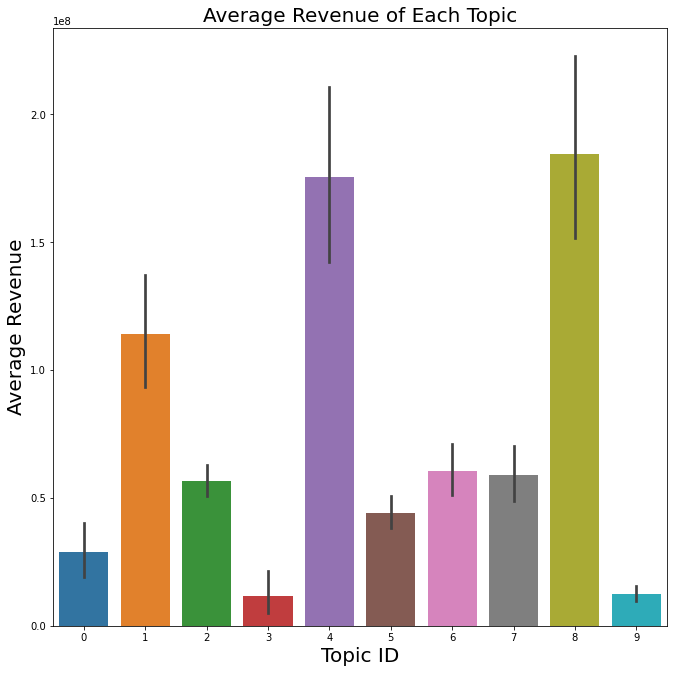

In [ ]:
import seaborn as sns
plt.figure(figsize=(11,11))
sns.barplot(x = 'topic_id', y = 'movie_box_office_revenue', data = movie_data_revenue)
plt.xticks(np.arange(num_topics))
plt.xlabel('Topic ID',fontsize=20)
plt.ylabel('Average Revenue',fontsize=20)
plt.title('Average Revenue of Each Topic',fontsize=20)
plt.show()

In [ ]:
revenue_list = movie_data_topic_group_mean['movie_box_office_revenue']
revenue_sorted = np.array(np.argsort(revenue_list))
topics = ldamodel.show_topics(num_topics=num_topics, formatted=False)
for idx in revenue_sorted[-3:]:
  print(topics[idx])

(1, [('agent', 0.006390628), ('police', 0.0054849274), ('officer', 0.0049105287), ('order', 0.004769868), ('case', 0.004721955), ('also', 0.0042952555), ('team', 0.0042855665), ('murder', 0.00416972), ('killed', 0.0037746406), ('death', 0.0037320754)])
(4, [('ship', 0.0070871827), ('battle', 0.006569742), ('kill', 0.0065081953), ('return', 0.006504555), ('fight', 0.0061917035), ('back', 0.005520218), ('take', 0.0054965853), ('attack', 0.005012285), ('find', 0.004963495), ('vampire', 0.0048637544)])
(8, [('find', 0.010287708), ('power', 0.008108911), ('world', 0.007993823), ('human', 0.0076208636), ('back', 0.0075230477), ('time', 0.005922291), ('alien', 0.0054932986), ('new', 0.004651807), ('take', 0.0046047913), ('help', 0.004211453)])


### 1.3 Keywords extraction of each plot, by KeyBERT

In [ ]:
# 1.3
!pip install -q keybert
from keybert import KeyBERT
kw_model = KeyBERT('all-MiniLM-L6-v2')
def extract_keywords(word_list):
  text = ' '.join(word_list)
  keywords = kw_model.extract_keywords(text, keyphrase_ngram_range=(1, 3), stop_words=None, use_mmr=True, diversity=0.5, top_n = 20)
  return keywords
def keyword2vec_weighted(keywords):
  keyword_prob_max = keywords[0][1]
  word_vec = np.zeros((word_vec_dim))
  word_num = 1
  for keyword_prob in keywords:
    word_list = keyword_prob[0].split()
    word_prob = float(keyword_prob[1]) 
    if(word_prob < 0.1):
      continue
    word_prob = word_prob / keyword_prob_max
    for word in word_list:
      try:
        word_vec = word_vec + word_prob * embeddings[word2index[word]]
        word_num += 1
      except:
        # print(word)
        pass
    return word_vec / word_num
def keyword2vec_unweight(keywords):
  keyword_prob_max = keywords[0][1]
  word_vec = np.zeros((word_vec_dim))
  word_num = 1
  for keyword_prob in keywords:
    word_list = keyword_prob[0].split()
    word_prob = float(keyword_prob[1]) 
    if(word_prob < 0.1):
      continue
    for word in word_list:
      try:
        word_vec = word_vec + embeddings[word2index[word]]
        word_num += 1
      except:
        # print(word)
        pass
    return word_vec / word_num
movie_data_sampled = movie_data.sample(1000)
movie_data_sampled['plot_keyword_list'] = movie_data_sampled['plot_clean'].apply(extract_keywords)
movie_data_sampled['plot_keyword_vec_weighted'] = movie_data_sampled['plot_keyword_list'].apply(keyword2vec_weighted)
movie_data_sampled['plot_keyword_vec_unweighted'] = movie_data_sampled['plot_keyword_list'].apply(keyword2vec_unweight)
# with open('./data/keywords.pkl', 'wb') as f:
#   pickle.dump(movie_data['plot_keyword_list','plot_keyword_vec_weighted','plot_keyword_vec_unweighted'], f, pickle.HIGHEST_PROTOCOL)

     |████████████████████████████████| 85 kB 2.9 MB/s 
     |████████████████████████████████| 237 kB 32.2 MB/s 
     |████████████████████████████████| 51 kB 6.7 MB/s 
     |████████████████████████████████| 5.5 MB 33.1 MB/s 
     |████████████████████████████████| 1.3 MB 47.4 MB/s 
     |████████████████████████████████| 163 kB 47.0 MB/s 
     |████████████████████████████████| 7.6 MB 33.9 MB/s 


Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [ ]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

keyword_vectors = np.stack(movie_data_sampled['plot_keyword_vec_weighted'].values)
cluster_dist = []
for n_cluster in range(2, 70):
  kmeans = KMeans(n_clusters=n_cluster, random_state=0)
  kmeans.fit(keyword_vectors)
  # get the sum of squared distances of samples to their closest cluster center
  # to see the cluster quality, pick the smallest one
  # print(kmeans.inertia_)
  cluster_dist.append(kmeans.inertia_)
print(np.argmin(cluster_dist) + 2)

69


In [ ]:
kmeans = KMeans(n_clusters=20, random_state=0)
kmeans_res = kmeans.fit(keyword_vectors)
label_cnt = np.bincount(kmeans_res.labels_)
top_10_cluster = np.argsort(label_cnt)[-10:]

In [ ]:
tsne = TSNE(perplexity=20, random_state=42)
keyword_vectors_2dim = tsne.fit_transform(keyword_vectors)

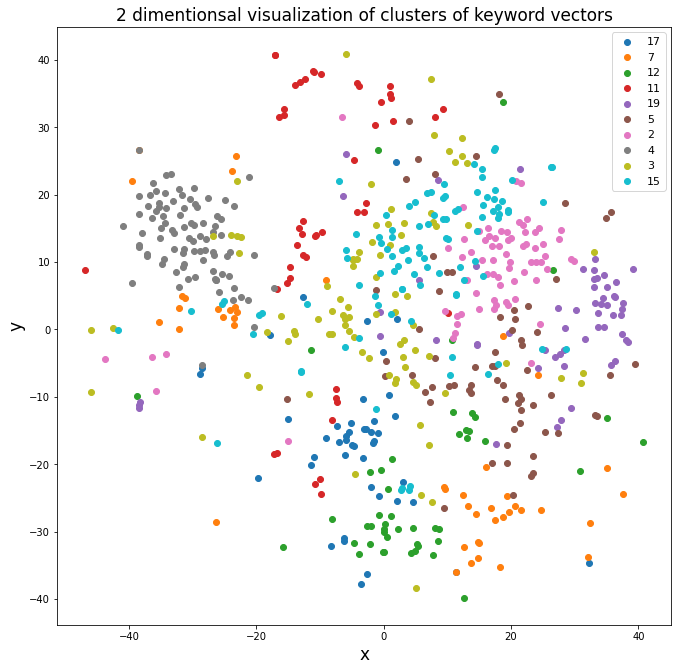

In [ ]:
plt.figure(figsize=(11,11))
for label_idx in top_10_cluster:
  plt.scatter(keyword_vectors_2dim[np.where(kmeans_res.labels_==label_idx),0],keyword_vectors_2dim[np.where(kmeans_res.labels_==label_idx),1], label = f"{label_idx}")
plt.legend(fontsize=11)
plt.xlabel('x', fontsize=17)
plt.ylabel('y', fontsize=17)
plt.title('2 dimentionsal visualization of clusters of keyword vectors', fontsize=17)
plt.show()

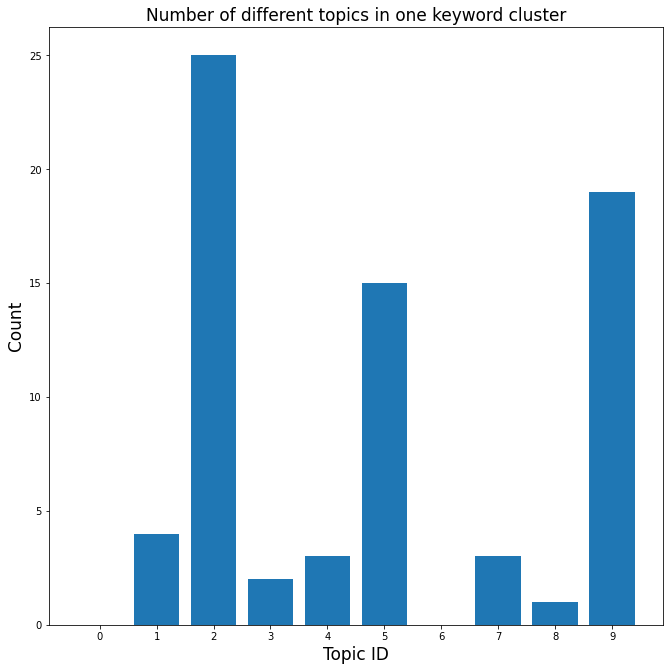

In [ ]:
movie_data_sampled['keyword_cluster_id'] = kmeans_res.labels_
movie_data_sampled_group_keyword = movie_data_sampled.groupby('keyword_cluster_id')
for i, group in movie_data_sampled_group_keyword:
  topics = group['topic_id']
  topic_count = np.bincount(topics)
  if(i == 2):
    break
plt.figure(figsize=(11,11))
plt.bar(np.arange(len(topic_count)),topic_count)
plt.xticks(np.arange(num_topics),np.arange(num_topics))
plt.xlabel('Topic ID', fontsize=17)
plt.ylabel('Count', fontsize=17)
plt.title('Number of different topics in one keyword cluster', fontsize=17)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


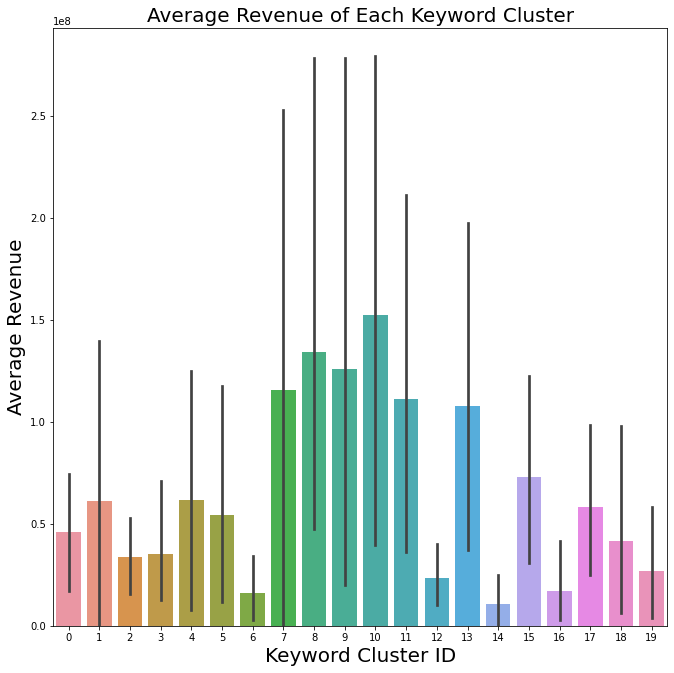

In [ ]:
movie_data_sampled_group_keyword_mean = movie_data_sampled_group_keyword.mean()
plt.figure(figsize=(11,11))
sns.barplot(x = 'keyword_cluster_id', y = 'movie_box_office_revenue', data = movie_data_sampled, errorbar = 'ci')
plt.xticks(np.arange(20))
plt.xlabel('Keyword Cluster ID',fontsize=20)
plt.ylabel('Average Revenue',fontsize=20)
plt.title('Average Revenue of Each Keyword Cluster',fontsize=20)
plt.show()

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
all_sim = cosine_similarity(word_vec.reshape(1, -1), embeddings)
all_sim.shape


NameError: ignored

In [ ]:
sorted_sim = np.argsort(all_sim[0])
all_sim[0][sorted_sim[-5:]]

In [ ]:
for word in word2index:
  if(word2index[word] in sorted_sim[-30:]):
    print(word)

### 1.4 Build keyword vector for each plot by summing up all word vectors in keyword list of each plot.

In [ ]:
# 1.4

### 1.5 Clustering of topics and keywords.
This part is the backbone of this first part analysis. 
#### 1.5.1 K-means of all plots' topic & keyword vectors.
#### 1.5.2 Observe clusters and visualize the revenue of each movie by color (discrete revenue level or continuous revenue color mapping)
#### 1.5.3 See whether certain clusters contain all top-selling or all bad-selling movies. 
#### 1.5.4 Here ends the qualitative analysis. For quantitative analysis, compare the averaged revenues in each cluster along with uncertainty (CI maybe) to see if the effect of different clusters of topics and keywords are significant.

In [ ]:
# 1.5.1

In [ ]:
# 1.5.2 & 1.5.3

### 1.6 Split movies into different genres (groupby)
#### 1.6.1 Decide main genres by frequency
#### 1.6.2 For movies belonging to each genres, do 1.5 again to see genre-related visualization.

In [ ]:
# 1.6.1

In [ ]:
# 1.6.2

### 1.7 Time-related topic & keywords changing
#### 1.7.1 Discretize time into decades.
#### 1.7.2 In each decade, do 1.5 to see time-related changing of topics and keywords.

In [ ]:
# 1.7.1

In [ ]:
# 1.7.2

# End of first part. 
#### Problems:
1. Do we need to combine genres and time? May result in too many groups of data and lack of amount of data in each group.

# 2. How will top blockbusters affect the revenues of other movies released in a close period?

## 2.1 What is a top blockbuster
There is no quantitative definition about blockbuster given by the film industry. Therefore, we give a simple and clear definition of top blockbusters. We simply define them as the annual box office champions. However, based on their revenue, we can also refine the blockbusters to different levels(eg. With box office revenue higher than 1 billion,2 billion...)

In [194]:
#To give an example, we could simply use the movie 'Avatar' released in 2009 with a box office revenue of nearly 2.8 billion

example = copy.deepcopy(movie_metadata)
time_split = pd.to_datetime(example['movie_release_date'])
example['month'] = time_split.apply(lambda x: x.month)
example['year'] = example['year'].astype(np.int64)
# print(example.index)
# for idx in example.index:
#   temp = eval(example.loc[idx,('movie_genres')])
#   print(type(temp))
#   example.loc[idx]['movie_genres'] = temp

# for index,row in example.iterrows():
#   # print(type(row['movie_genres']))
#   row['movie_genres'] = eval(row['movie_genres'])
#   print(type(row['movie_genres']))

ava_example = example.loc[example['movie_name']==('Avatar'),:]
ava_example = ava_example[ava_example['movie_box_office_revenue'].isnull() == False]

# ava_example = example.loc[[2133,23702],:]
# print(ava_example)
ava_example #index is 23702 
# type(ava_example['movie_genres'])
# type(example['movie_genres'].loc[2133])

,movie_id,freebase_movie_id,movie_name,movie_release_date,movie_box_office_revenue,movie_runtime,movie_languages,movie_countries,movie_genres,year,month
23702,4273140,/m/0bth54,Avatar,2009-12-10,2.782275e+09,178.0,"{""/m/02h40lc"": ""English Language"", ""/m/06nm1"":...","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2009,12


## 2.2 How do we define movies released in a close period with the top blockbusters
Given some empirical knowledge about the historical box office, we give a preliminary definition for movies released in a close period with the top blockbusters: Movies that are released in the same month with the top blockbusters are considered to be released in a close period.

In [206]:
ava_year = ava_example['year'].item()
ava_month = ava_example['month'].item()
# type(ava_year)
close_release =  copy.deepcopy(example.loc[(example['year'] == ava_year) & (example['month']==ava_month) & (example['movie_id'] != ava_example['movie_id'].item())])
close_release = close_release[close_release['movie_box_office_revenue'].isnull() == False]
close_release.shape
# type(close_release['movie_genres'].loc[2133])
# type(example['movie_genres'].loc[2133])

(16, 11)

## 2.3 Assumptions and analysis


* We assume that top blockbusters have a negative influence on the revenues of movies released close to it. 
* In our future experiments, we will analyse the impact on all the movies released close to the top blockbusters for sure, however, now we just wanna illustrate there is such a pattern that supports our assumption. Therefore, we want to visualize the pattern for just one of the movies released close to our selected top blockbuster 'Avatar'.
* To prove our assumption, we wanna minimize the impact on revenues due to those movies' own quality. Although film producers may not agree that box office revenue is an ideal indication of movie quality, we as data scientists, will still make a naive assumption that high box office revenue always means high quality. Therefore, our analysis will be mainly conducted on the median of revenue of those movies released close to the top blockbuster since extremely low revenue may be mainly caused by the movie's own quality, making the blockbuster's effect neglectable while high quality movies could easily overpower this negative influence.(Another movie released in the same month with the annual blockbuster might have just a slightly lower revenue. eg. *Avengers: Age of Ultron* and *Furious 7*)

In [227]:
##Get the medium in revenue in the close released movies and its generes


medium_rev = close_release.loc[close_release.movie_box_office_revenue<close_release.movie_box_office_revenue.median()]
medium_rev = medium_rev.loc[medium_rev.movie_box_office_revenue == medium_rev.movie_box_office_revenue.max()]
# print(medium_rev)

medium_rev_genre = eval(medium_rev['movie_genres'].item())
print('the median revenue of the close released movies is: {}'.format(medium_rev['movie_box_office_revenue'].item()))
# ava_genre = eval(ava_example['movie_genres'].item())

# print(len(medium_rev_genre),type(runnerup_genre))
# print(len(ava_genre),type(ava_genre))
# for i in runnerup_genre:
#   print(i in ava_genre)

##Get all the movies with a valid box office revenue(not NaN) in that year
mv_same_year = copy.deepcopy(example.loc[(example['year'] == ava_year)])
mv_same_year = mv_same_year[mv_same_year['movie_box_office_revenue'].isnull() == False]
# mv_same_year

genre_rev_diff_list = []
genre_list = []
for genre in medium_rev_genre:
  genre_indices = []
  for index,row in mv_same_year.iterrows():
    # print(type(row['movie_genres']))
    row_genre = eval(row['movie_genres'])
    if genre in row_genre:
      genre_indices.append(index)
  genre_df = copy.deepcopy(mv_same_year.loc[genre_indices,:])
  genre_revenue_mean = genre_df['movie_box_office_revenue'].mean()
  # print(genre_revenue_mean)
  genre_revenue_diff = genre_revenue_mean - medium_rev['movie_box_office_revenue'].item()
  genre_rev_diff_list.append(-genre_revenue_diff)
  genre_list.append(medium_rev_genre[genre])
print(genre_rev_diff_list,genre_list)



the median revenue of the close released movies is: 45302911.0
[-18657817.777777776, 24931643.42105263, -2051518.3096446693, -27997721.569105685, -2796961.3870967776, -31223848.174999997] ['Romantic comedy', 'World cinema', 'Drama', 'Comedy', 'Romantic drama', 'Romance Film']


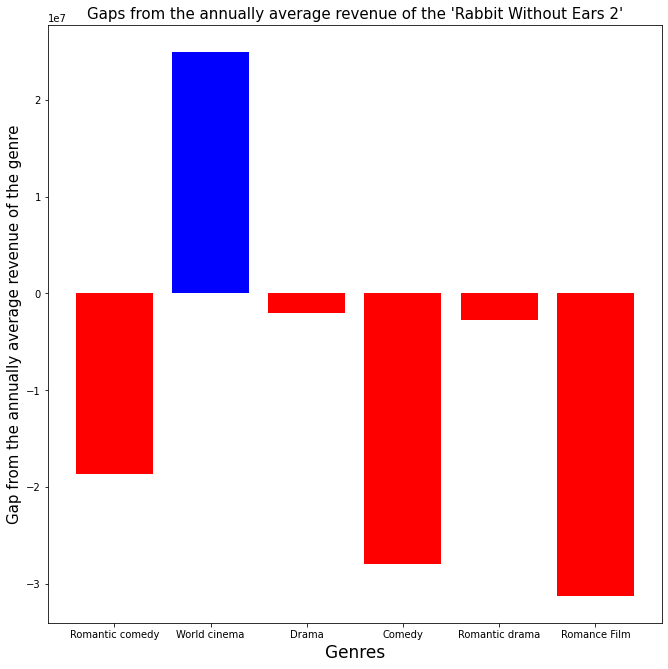

In [233]:
genre_rev_diff_list = np.asarray(genre_rev_diff_list)
median_name = medium_rev['movie_name'].item()
plt.figure(figsize=(11,11))
plt.bar(genre_list,genre_rev_diff_list,color = np.where(genre_rev_diff_list>0,'b','r'))
plt.xlabel('Genres', fontsize=17)
plt.ylabel('Gap from the annually average revenue of the genre', fontsize=15)
plt.title('Gaps from the annually average revenue of the \''+median_name+ '\'', fontsize=15)
plt.show()

### Analysis:
As illustrated in the figure above, one film could have several genres. The selected film has negative gaps(illustrated with red bars) from the annual averages in 5 out of 6 genres, which means it has a lower revenue compared to the average in most of its classified genres. Of course, this single case is far from enough to validate out assumption, but it demonstrates that there is a pattern supporting our assumption and our analysis method is reasonable.

## 2.4 Rule out the influence of released months


*   Hordes of film analysts, more often than not, tend to believe that movies released in different time of the year, even with close topic or genres, have considerably different possibility to reach a high revenue. One classic argument is that movies released between Halloween and Christmas have a much higher chance to get higher revenue than movie released during spring(March,April). One can easily finds tons of examples.(eg. *Frozen* vs *Monsters University*, *Spider-Man: No Way Home* vs *Black Widow*) 
*   To defende out assumption against this potential influence, we also compare the revenue of our selected movie with the average revenue of movies from its genres that are released in the same month of the previous year and the next year. For example, since our selected movie *Rabbit without ears 2* is released in Dec,2009. We will compare its revenue to movies with the same genre that are released in Dec,2008 and Dec,2010




In [236]:
#Movies from the same month of previous year
mv_pre_year = copy.deepcopy(example.loc[(example['year'] == ava_year-1) & (example['month'] == ava_month)])
mv_pre_year = mv_pre_year[mv_pre_year['movie_box_office_revenue'].isnull() == False]

#Movies from the same month of next year
mv_next_year = copy.deepcopy(example.loc[(example['year'] == ava_year+1) & (example['month'] == ava_month)])
mv_next_year = mv_next_year[mv_next_year['movie_box_office_revenue'].isnull() == False]

genre_pre_rev_diff_list = []
genre_next_rev_diff_list = []
genre_list = []
for genre in medium_rev_genre:
  genre_pre_indices = []
  genre_next_indices = []
  for index,row in mv_pre_year.iterrows():
    # print(type(row['movie_genres']))
    row_genre = eval(row['movie_genres'])
    if genre in row_genre:
      genre_pre_indices.append(index)
  for index,row in mv_next_year.iterrows():
    # print(type(row['movie_genres']))
    row_genre = eval(row['movie_genres'])
    if genre in row_genre:
      genre_next_indices.append(index)


  genre_df_pre = copy.deepcopy(mv_pre_year.loc[genre_pre_indices,:])
  genre_rev_mean_pre = genre_df_pre['movie_box_office_revenue'].mean()
  genre_df_next = copy.deepcopy(mv_next_year.loc[genre_next_indices,:])
  genre_rev_mean_next = genre_df_next['movie_box_office_revenue'].mean()
  # print(genre_revenue_mean)
  genre_rev_diff_pre =  medium_rev['movie_box_office_revenue'].item() - genre_rev_mean_pre
  genre_pre_rev_diff_list.append(genre_rev_diff_pre)
  genre_rev_diff_next =  medium_rev['movie_box_office_revenue'].item() - genre_rev_mean_next
  genre_next_rev_diff_list.append(genre_rev_diff_next)
  genre_list.append(medium_rev_genre[genre])
print(genre_pre_rev_diff_list,genre_next_rev_diff_list)

[-2419984.0, 31231229.25, -62091916.0, -57797013.0, -126254157.0, -78919571.375] [-3365996.0, 34215342.0, -2437284.9090909064, -58063984.25, nan, -13287249.0]


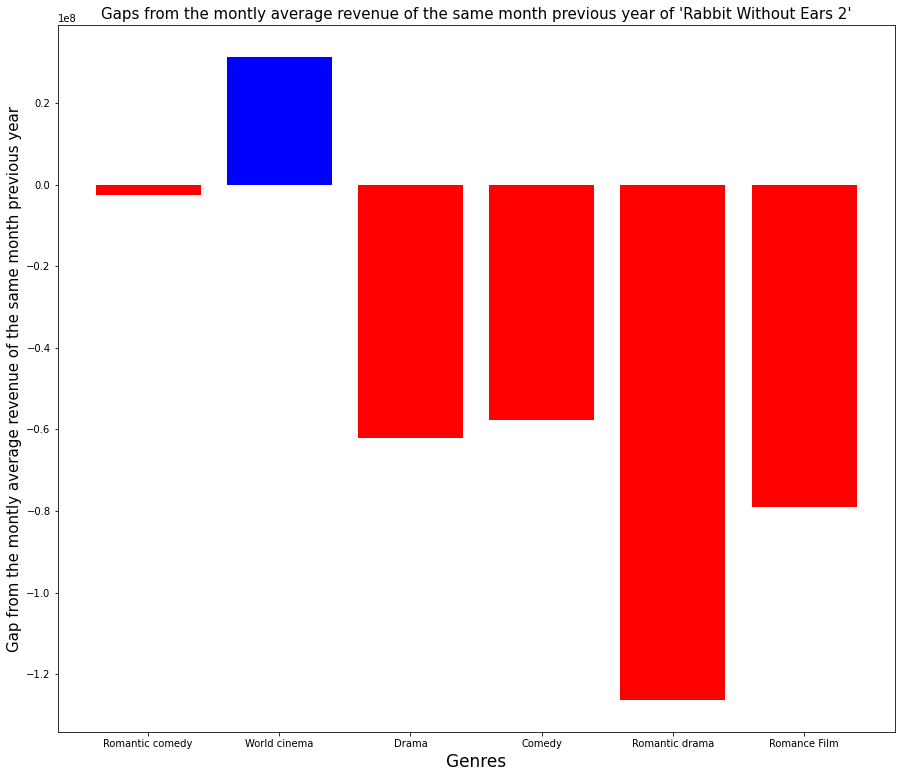

In [239]:
genre_pre_rev_diff_list = np.asarray(genre_pre_rev_diff_list)
genre_next_rev_diff_list = np.asarray(genre_next_rev_diff_list)
median_name = medium_rev['movie_name'].item()
plt.figure(figsize=(15,13))
plt.bar(genre_list,genre_pre_rev_diff_list,color = np.where(genre_pre_rev_diff_list>0,'b','r'))
plt.xlabel('Genres', fontsize=17)
plt.ylabel('Gap from the montly average revenue of the same month previous year', fontsize=15)
plt.title('Gaps from the montly average revenue of the same month previous year of \''+median_name+ '\'', fontsize=15)
plt.show()

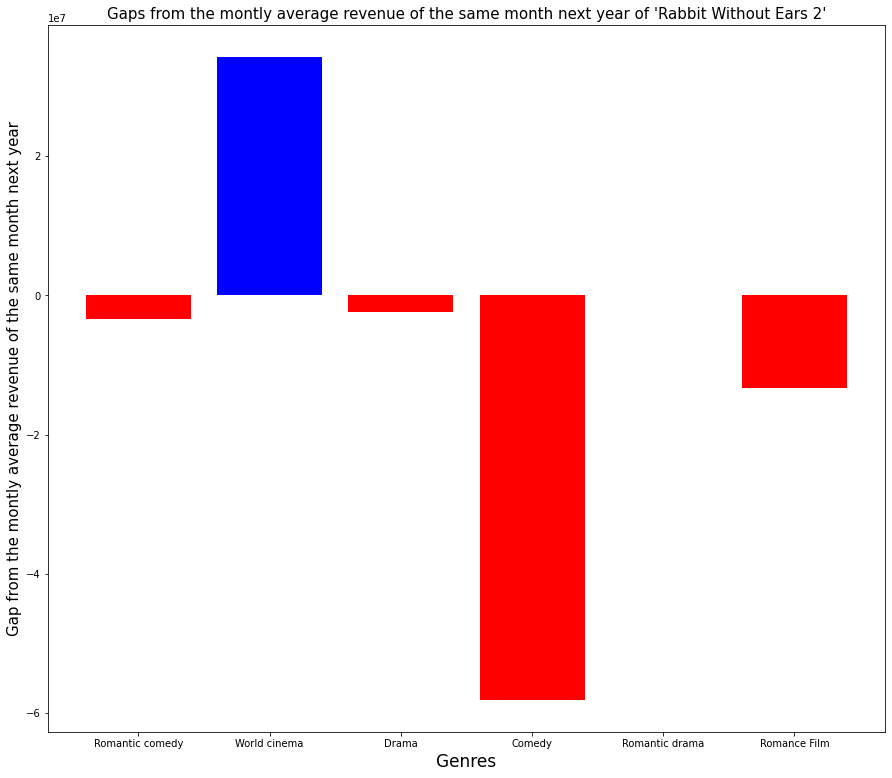

In [240]:
plt.figure(figsize=(15,13))
plt.bar(genre_list,genre_next_rev_diff_list,color = np.where(genre_next_rev_diff_list>0,'b','r'))
plt.xlabel('Genres', fontsize=17)
plt.ylabel('Gap from the montly average revenue of the same month next year', fontsize=15)
plt.title('Gaps from the montly average revenue of the same month next year of \''+median_name+ '\'', fontsize=15)
plt.show()

### Analysis:
As we can see from the two figures above, the revenue of our selected movie *Rabbit without ears 2* is lower than the average revenue from same month previous year and next year in most of its genres. We can also notice that the seleted movie always shows a positive gap in the same genre, namely **World cinema**. This might indicate that *Rabbit without ears 2* is a high quality movie in this specific genre, enabling it to overpower of negative influence of the top blockbuster.

## 2.5 Beyond genres
The analysis based on genres provides us with an intuitive demonstration of blockbusters' influence. However, even movies within the same genre could be extremely different(*Divergent* vs *The Hunger Games*). Therefore, we need a more precise way measure the similarity between movies in order to compare the revenue of our selected movies with its most similar movie that is not affected by any blockbuster. Currently, we have two ideas:


1.   Computing Euclidean distance or cosine similarity between the word vector extracted in Part 1.
2.   Merging the word vector and the other metadata of movies in a latent space and measured distance in that latent space.

However, the final choice and more detailed implementation will need more discussion.
